In [1]:
# 1. Для реализованной модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле 
# и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, y = load_digits(return_X_y=True)
X.shape, y.shape

((1797, 64), (1797,))

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [4]:
# 3. *Оптимизировать процесс обучения градиентного бустинга, чтобы он занимал меньше времени.


def gb_predict(X, trees_list, eta):
# Было:
#    predictions = np.zeros(X.shape[0])
#    for i, x in enumerate(X):
#        prediction = 0
#        for alg in trees_list:
#            prediction += eta * alg.predict([x])[0]
#            predictions[i] = prediction
    
# Стало:
    predictions = np.array(
        sum([eta * alg.predict(X) for alg in trees_list])
    )
    return predictions

In [5]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [6]:
def residual(y, z):
    return - (z - y)

In [7]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta):
    
    # Список деревьев
    trees = []
    
    # Запись ошибки на обучающей и тестовой выборке на каждой итерации в списки
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # Обучение на выборке и добавление в список
        if len(trees) == 0:
            # Обучение первого дерева на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
        else:
            # Ответы на текущей композиции
            target = gb_predict(X_train, trees, eta)
            
            # Алгоритмы, начиная со второго, обучаются со сдвигом
            tree.fit(X_train, residual(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [8]:
%%time
# Число деревьев в ансамбле
n_trees = 10
# Максимальная глубина деревьев
max_depth = 3
# Шаг
eta = 0.1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

Wall time: 117 ms


In [9]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, eta):
    train_prediction = gb_predict(X_train, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')
    
evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)

Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 6.434511370562073
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 6.732809239032941


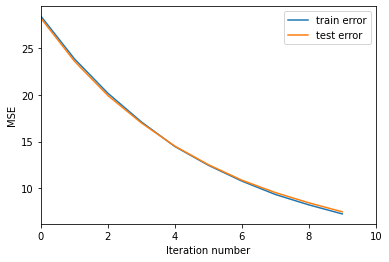

In [10]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()
    
get_error_plot(n_trees, train_errors, test_errors)

In [11]:
%%time
# Увеличу количество деревьев, глубину оставлю прежней
n_trees = 50
max_depth = 3

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

Wall time: 991 ms


In [12]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, eta):
    train_prediction = gb_predict(X_train, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')
    
evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)

Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 1.1692434175332773
Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 1.9356926442779627


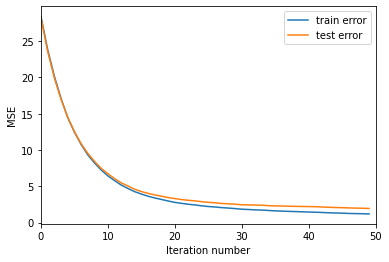

In [13]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()
    
get_error_plot(n_trees, train_errors, test_errors)

In [14]:
%%time
# Верну прежнее количество деревье, а глубину увеличу
n_trees = 10
max_depth = 12

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

Wall time: 221 ms


In [15]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, eta):
    train_prediction = gb_predict(X_train, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')
    
evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)

Ошибка алгоритма из 10 деревьев глубиной 12     с шагом 0.1 на тренировочной выборке: 3.460981802965337
Ошибка алгоритма из 10 деревьев глубиной 12     с шагом 0.1 на тестовой выборке: 5.460952469645787


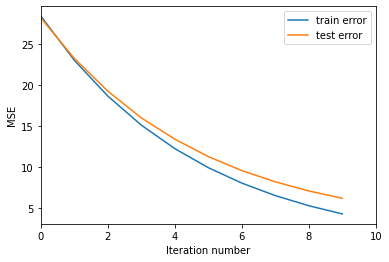

In [16]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()
    
get_error_plot(n_trees, train_errors, test_errors)

In [17]:
%%time
# Поставлю большими количество деревье и глубину 
n_trees = 50
max_depth = 12

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

Wall time: 1.68 s


In [18]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, eta):
    train_prediction = gb_predict(X_train, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')
    
evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)

Ошибка алгоритма из 50 деревьев глубиной 12     с шагом 0.1 на тренировочной выборке: 0.0007640332926787804
Ошибка алгоритма из 50 деревьев глубиной 12     с шагом 0.1 на тестовой выборке: 2.608208239989548


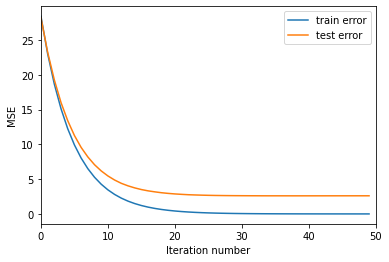

In [19]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()
    
get_error_plot(n_trees, train_errors, test_errors)

In [20]:
print(f'В 3-м (n_trees = 10, max_depth = 12) и 4-м (n_trees = 50, max_depth = 12) вариантах разрывы ошибок на обучении и тесте большие. В 1-м варианте(n_trees = 10, max_depth = 3) минимальный разрыв, а во 2-м (n_trees = 50, max_depth = 3) минимальные ошибки. Для идеального варианта надо немного увеличить количество деревьев, а глубину менять не стоит.')

В 3-м (n_trees = 10, max_depth = 12) и 4-м (n_trees = 50, max_depth = 12) вариантах разрывы ошибок на обучении и тесте большие. В 1-м варианте(n_trees = 10, max_depth = 3) минимальный разрыв, а во 2-м (n_trees = 50, max_depth = 3) минимальные ошибки. Для идеального варианта надо немного увеличить количество деревьев, а глубину менять не стоит.


In [21]:
%%time
# Задам количество деревьев чуть больше, чем в первом варианте, а глубину оставлю минимальной 
n_trees = 12
max_depth = 3

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

Wall time: 156 ms


In [22]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, eta):
    train_prediction = gb_predict(X_train, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')
    
evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)

Ошибка алгоритма из 12 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 5.163109441769078
Ошибка алгоритма из 12 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 5.4584645736456885


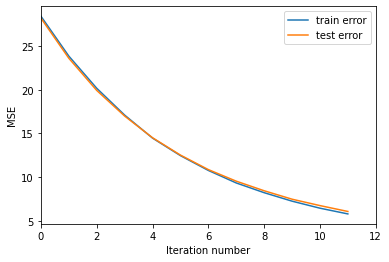

In [23]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()
    
get_error_plot(n_trees, train_errors, test_errors)

In [44]:
print(f'В последнем варианте (n_trees = 12, max_depth = 3) разрыв ошибок маленький, а сами величины ошибок удалось уменьшить за счет небольшого увеличения количества деревьев. ')

В последнем варианте (n_trees = 12, max_depth = 3) разрыв ошибок маленький, а сами величины ошибок удалось уменьшить за счет небольшого увеличения количества деревьев. 


In [24]:
# 2. *Модифицировать реализованный алгоритм градиентного бустинга, чтобы получился стохастический градиентный бустинг. 
# Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости 
# от числа итераций.

def sgb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta, sample_coef=0.5):
    n_samples = X_train.shape[0] 
    # Список деревьев
    trees = []
    
    # Запись ошибки на обучающей и тестовой выборке на каждой итерации в списки
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        # Рандомный индекс
        ind = np.random.randint(0, n_samples, int(n_samples * sample_coef))
        X_train_sampled, y_train_sampled = X_train[ind], y_train[ind]
        
        # Обучение на выборке и добавление в список
        if len(trees) == 0:       
            # Обучение первого дерева на обучающей выборке            
            tree.fit(X_train_sampled, y_train_sampled)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
        else:
            # Ответы на текущей композиции
            target = gb_predict(X_train_sampled, trees, eta)
            
            # Алгоритмы, начиная со второго, обучаются со сдвигом
            tree.fit(X_train_sampled, residual(y_train_sampled, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [25]:
%%time
# Возьму лучший вариант по количеству деревьев и глубине
n_trees = 12
max_depth = 3
trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

Wall time: 122 ms


In [26]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, eta):
    
    train_ind = np.random.randint(X.shape[0], size=1)
    
    train_prediction = gb_predict(X_train[train_ind], trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)

Ошибка алгоритма из 12 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 8.450415291891472
Ошибка алгоритма из 12 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 5.4584645736456885


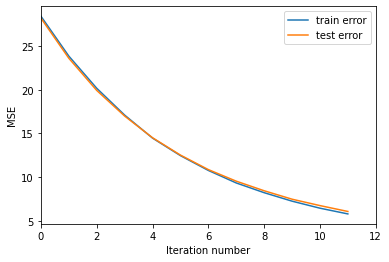

In [27]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()
get_error_plot(n_trees, train_errors, test_errors)